# Importing Libraries and setting paths

Mount the HDD (in files), else no image can be accessed 

In [9]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="3"
from stardist.models import StarDist2D 
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
import cv2
import numpy as np

from glob import glob
import pandas as pd

# creates a pretrained model (one for mIF and one for H&E)
m1 = StarDist2D.from_pretrained('2D_versatile_fluo')
m2 = StarDist2D.from_pretrained('2D_versatile_he')

#Path to store
pth_main="/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/"


#CD3 and DAPI mIF single channel images (Images are the same for serial and same section)
cd3_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/CD68_Channel/*"))
dapi_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/DAPI_Channel/*"))

#H&E raw images
he_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/*"))

#he_deconv_imgs=sorted(glob("/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/fluo_trial1/he_fluo/*"))
he_deconv_imgs=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/*"))
#Blue_nuclei from k-means, optional
#blue_n_images=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479//Blue_Nuclei/*/b*"))

print(len(cd3_images))
print(len(dapi_images))
print(len(he_images))
print(len(he_deconv_imgs))
#print(len(blue_n_images))
if(len(cd3_images)==len(dapi_images) and len(cd3_images)==len(he_images)and len(he_deconv_imgs)==len(he_images)):
    print("**********All Good***********")
else:
    print("Number of images not equal")
#Useful pointers to start and stop processing, therefore indices will always be from y to z
y=0
#y=34
#z=34
z=len(cd3_images)



Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
45
45
45
45
**********All Good***********


# Avoid running the next 5 cells

It takes a lot of time to detect nuclei

(Potential speed boosting possible)

In [10]:
#for CD3 only
def fn(img,pth,th=10):
    
    i = cv2.imread(img,0)
    #i=cv2.resize(i,(3328,3328))
    _, th_img = cv2.threshold(i, th, 255, cv2.THRESH_BINARY)
    cv2.imwrite(pf+"/"+pth+".png",th_img)

    print(pf+"/"+pth+".png")
        #Additional code to note data from stardist like cell number, size etc.
        #lst.append(len(np.unique(labels)))
        #df=pd.DataFrame(lst)
        #df.to_csv(imgs[0].split("/")[2]+".csv")
        

In [11]:
#Function to detect nuclei, use m1 for mIF (to detect CD3 and DAPI postive cells/nuclei), m2 for H&E (to detect blue nuclei)
def fn2(img,pth,m):
    

    if(m!=m2):
        i = cv2.imread(img,0)
    else:
        i = cv2.imread(img)
        i= cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    #i=cv2.resize(i,(3328,3328))


    try:
        labels, a = m.predict_instances(normalize(i))
    except:
        print("Putting blank image")
        labels=np.zeros_like(i)


    np.save(pf+"/"+pth+".npy",labels)

    print(pf+"/"+pth+".npy")
        #Additional code to note data from stardist like cell number, size etc.
        #lst.append(len(np.unique(labels)))
        #df=pd.DataFrame(lst)
        #df.to_csv(imgs[0].split("/")[2]+".csv")
        

In [4]:
x=y
for c in he_images[y:y+z]:
    pf=pth_main+"/Before/"+f"{x:03d}"
    os.makedirs(pf,exist_ok=True)
    print(pf)
    fn2(c,"he_blue_nuclei",m2)
    x=x+1

/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/000


2024-10-13 21:07:47.433386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-10-13 21:07:47.451042: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699835000 Hz
2024-10-13 21:07:47.904733: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-10-13 21:07:48.607703: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2024-10-13 21:07:49.343903: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-10-13 21:07:53.576454: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1160773632 exceeds 10% of free system memory.


/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/000/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/001
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/001/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/002


2024-10-13 21:09:17.776923: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000488960 exceeds 10% of free system memory.


/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/002/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/003
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/003/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/004


2024-10-13 21:11:23.034418: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1035206656 exceeds 10% of free system memory.


/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/004/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/005
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/005/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/006


2024-10-13 21:13:18.415710: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 960806912 exceeds 10% of free system memory.


/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/006/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/007
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/007/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/008
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/008/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/009
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/009/he_blue_nuclei.npy
/media/saab/f7ee81f1-

2024-10-13 21:14:54.796734: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 966000640 exceeds 10% of free system memory.


/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/010/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/011
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/011/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/012
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/012/he_blue_nuclei.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/013
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/013/he_blue_nuclei.npy
/media/saab/f7ee81f1-

In [5]:
x=y
# ---> Image 35 probably has no CD3 positive regions, the kernel breaks because of it, hence, current solution is to put
# ---> a blank image
for a,b in zip(cd3_images[y:y+z],dapi_images[y:y+z]):
    pf=pth_main+"/Before/"+f"{x:03d}"
    
    os.makedirs(pf,exist_ok=True)
    
    fn2(b,"mif_dapi",m1)
    fn(a,"mif_cd68")
    x=x+1

/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/000/mif_dapi.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/000/mif_cd68.png
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/001/mif_dapi.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/001/mif_cd68.png
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/002/mif_dapi.npy
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/002/mif_cd68.png
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei//Before/003/mif_dapi.npy
/media

dapi_images[36]

he_images[36]

pf=pth_main+"/Before/"+f"{35:03d}" 
print(pf)
os.makedirs(pf,exist_ok=True)
null_image=np.zeros_like(cv2.imread(cd3_images[36],0))
plt.imsave(pf+"/"+"mif_cd3.png",null_image,cmap="gray")
#fn(dapi_images[36],"mif_dapi",m1)
#fn(he_images[36],"he_blue_nuclei",m2)

# Start running here

In [6]:

pths_cd3_2=sorted(glob(pth_main+"Before/*/*cd68*"))
pths_dapi_2=sorted(glob(pth_main+"Before/*/*da*"))
pths_bn_2=sorted(glob(pth_main+"Before/*/he_bl*"))

In [7]:
he_deconv_imgs

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC152-H&E-padded.tiff',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC153-H&E-padded.tiff',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC155-H&E-padded.tiff',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC156-H&E-padded.tiff',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC157-H&E-padded.tiff',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC158-H&E-padded.tiff',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/H&E_Final/TNLC162-H&E-padded.tiff',

## Re-checking images containing marked individual nuclei 

Should show 'all good'

In [8]:
print(len(pths_bn_2))
print(len(pths_dapi_2))
print(len(pths_cd3_2))
#print(len(blue_n_images))
if(len(pths_bn_2)==len(pths_cd3_2) and len(pths_cd3_2)==len(pths_dapi_2)):
    print("**********All Good***********")
else:
    print("Number of images not equal")

45
45
45
**********All Good***********


# Creating the "after" folder

## Followed by two sub-folders

### Direct overlap 
#### i.e. "clear" 
### one with gaussian blurring 
#### i.e. Gaussian blurring kernel

In [20]:
gaussian_blur_kernel=31

pth_main_2= pth_main+"After/"
os.makedirs(pth_main_2,exist_ok=True)

pth_main_3=pth_main_2+"clear/"
os.makedirs(pth_main_3,exist_ok=True)

pth_main_4=pth_main_2+"filtered_"+str(gaussian_blur_kernel)+"/"
os.makedirs(pth_main_4,exist_ok=True)

print(pth_main_2)
print(pth_main_3)
print(pth_main_4)

/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/clear/
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/filtered_31/


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile

x = y

# Directories for visualization images
pth_visualization_3 = pth_main_3 + '_visualization'
pth_visualization_4 = pth_main_4 + '_visualization'

# Create the visualization directories if they do not exist
os.makedirs(pth_visualization_3, exist_ok=True)
os.makedirs(pth_visualization_4, exist_ok=True)

for a, b, c, d in zip(pths_cd3_2[y:y+z], pths_dapi_2[y:y+z], pths_bn_2[y:y+z], he_deconv_imgs[y:y+z]):
    
    # --- Read mIF Images in Grayscale ---
    # Read CD3-stained image
    img_cd3 = cv2.imread(a, 0)
    
    # Read DAPI-stained image
    img_dapi = np.load(b)
    img_dapi = np.array(img_dapi, dtype=np.uint8)
    
    # --- Threshold Images to Get Binary Masks ---
    _, t1 = cv2.threshold(img_cd3, 0, 255, cv2.THRESH_BINARY)
    _, t2 = cv2.threshold(img_dapi, 0, 255, cv2.THRESH_BINARY)
    
    # --- Bitwise Overlap to Find Common Regions ---
    overlap = cv2.bitwise_and(t1, t2)
    
    # --- Dilate the Overlap Mask ---
    kernel = np.ones((15, 15), np.uint8)
    dilate = cv2.dilate(overlap, kernel, iterations=1)
    
    # --- Read H&E Blue Nuclei Image ---
    img_b_n = np.load(c)
    img_b_n = np.array(img_b_n, dtype=np.uint8)
    
    # Threshold to get binary mask
    _, t3 = cv2.threshold(img_b_n, 0, 255, cv2.THRESH_BINARY)
    
    # --- Read H&E Image and Split Channels ---
    img_he = cv2.imread(d)
    b, g, r = cv2.split(img_he)
    
    # --- Overlap Dilated Mask with Blue Nuclei ---
    m1 = cv2.bitwise_and(b, dilate)
    m2 = cv2.bitwise_and(m1, t3)
    _, cd3p = cv2.threshold(m2, 0, 255, cv2.THRESH_BINARY)
    
    # --- Apply Gaussian Blur ---
    cd3p_1 = cv2.GaussianBlur(cd3p, (gaussian_blur_kernel, gaussian_blur_kernel), 0)
    
    # --- Normalize the Blurred Image if Necessary ---
    if np.max(cd3p_1) > 50:
        cd3p_1 = (cd3p_1 - np.min(cd3p_1)) / (np.max(cd3p_1) - np.min(cd3p_1))
        cd3p_1 = cd3p_1 * 255
        cd3p_1 = np.array(cd3p_1, np.uint8)
    
    # --- Ensure All Arrays Have the Same Dimensions ---
    # Resize masks if necessary to match the dimensions of the H&E image
    if cd3p.shape != img_he.shape[:2]:
        cd3p = cv2.resize(cd3p, (img_he.shape[1], img_he.shape[0]))
    if cd3p_1.shape != img_he.shape[:2]:
        cd3p_1 = cv2.resize(cd3p_1, (img_he.shape[1], img_he.shape[0]))
    
    # --- Create 4-Channel Images ---
    # Stack the channels into a 4-channel image
    im_final = cv2.merge([r, g, b, cd3p])        # cd3p in the 4th channel
    im_final_blur = cv2.merge([r, g, b, cd3p_1]) # cd3p_1 in the 4th channel
    
    # --- Save the 4-Channel Images as TIFF Files ---
    tifffile.imwrite(os.path.join(pth_main_3, f"{x:03d}.tiff"), im_final)
    tifffile.imwrite(os.path.join(pth_main_4, f"{x:03d}.tiff"), im_final_blur)
    
    # --- Create Visualization Images with Improved Green Channel ---
    
    # For cd3p
    g_visualization = np.where(cd3p > 0, cd3p, g).astype(np.uint8)
    visualization_image = cv2.merge([r, g_visualization, b])
    plt.imsave(os.path.join(pth_visualization_3, f"{x:03d}.png"), visualization_image)
    
    # For cd3p_1
    g_visualization_blur = np.where(cd3p_1 > 0, cd3p_1, g).astype(np.uint8)
    visualization_image_blur = cv2.merge([r, g_visualization_blur, b])
    plt.imsave(os.path.join(pth_visualization_4, f"{x:03d}.png"), visualization_image_blur)
    
    print(f"Processed image {x}")
    x += 1


Processed image 0
Processed image 1
Processed image 2
Processed image 3
Processed image 4
Processed image 5
Processed image 6
Processed image 7
Processed image 8
Processed image 9
Processed image 10
Processed image 11
Processed image 12
Processed image 13
Processed image 14
Processed image 15
Processed image 16
Processed image 17
Processed image 18
Processed image 19
Processed image 20
Processed image 21
Processed image 22
Processed image 23
Processed image 24
Processed image 25
Processed image 26
Processed image 27
Processed image 28
Processed image 29
Processed image 30
Processed image 31
Processed image 32
Processed image 33
Processed image 34
Processed image 35
Processed image 36
Processed image 37
Processed image 38
Processed image 39
Processed image 40
Processed image 41
Processed image 42
Processed image 43
Processed image 44


# Debugging

In [33]:
    #cd3p=cv2.bitwise_and(t3,dilate)
    
    #kernel = np.ones((15,15),np.uint8)
    #cd3p=cv2.dilate(cd3p,kernel,iterations = 1)
    #cd3p_1=cv2.cvtColor(cd3p,cv2.COLOR_BGR2GRAY)

In [34]:
img_dapi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

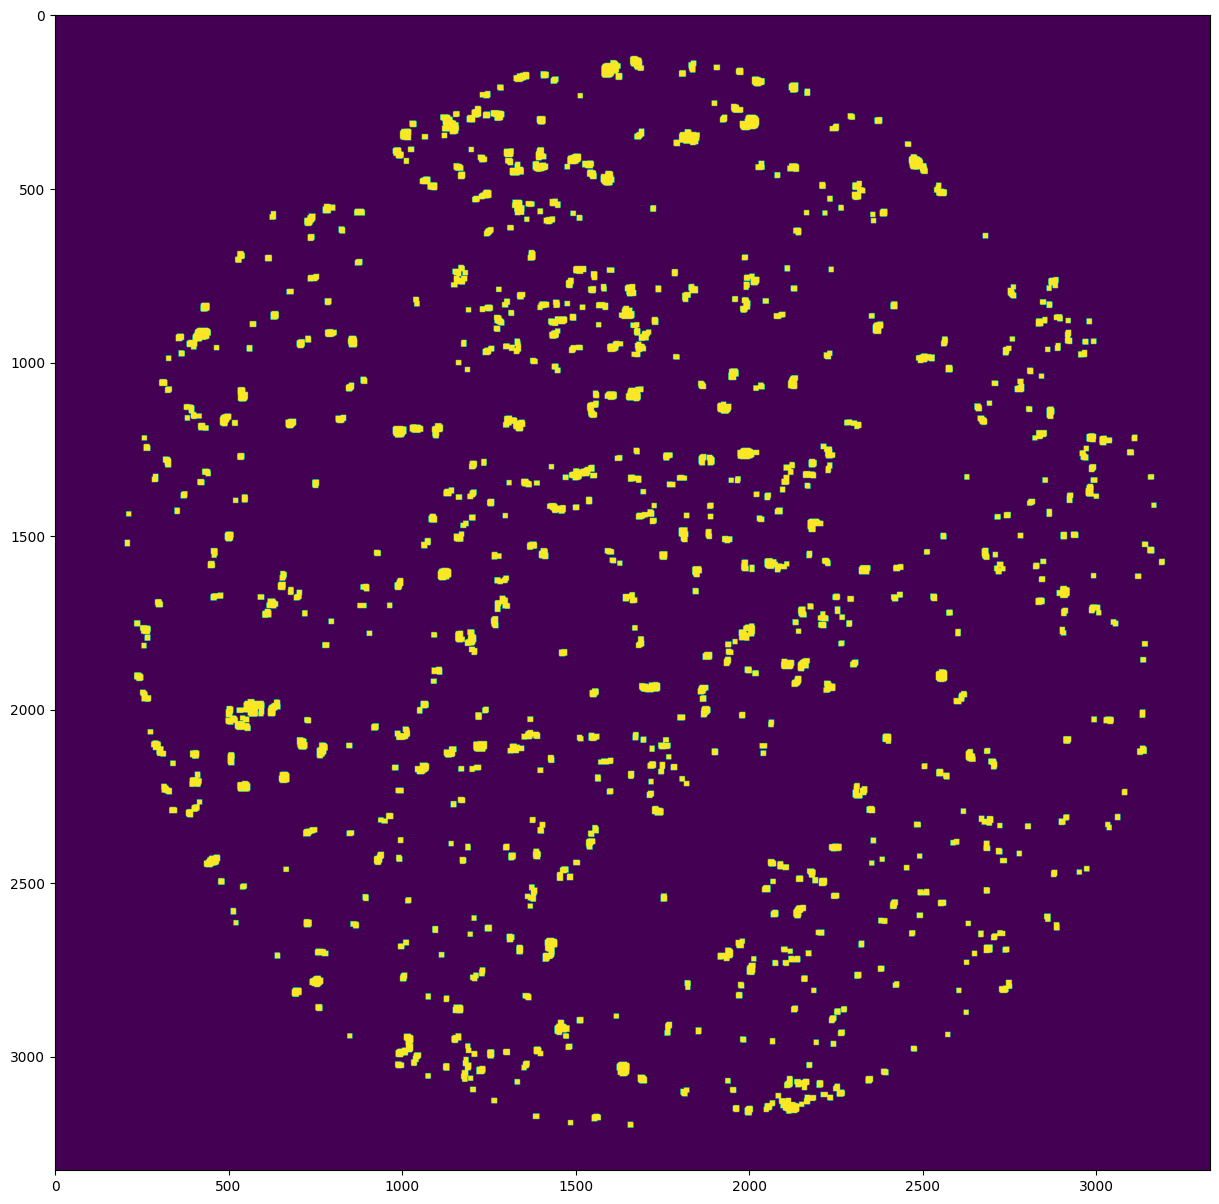

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(dilate)

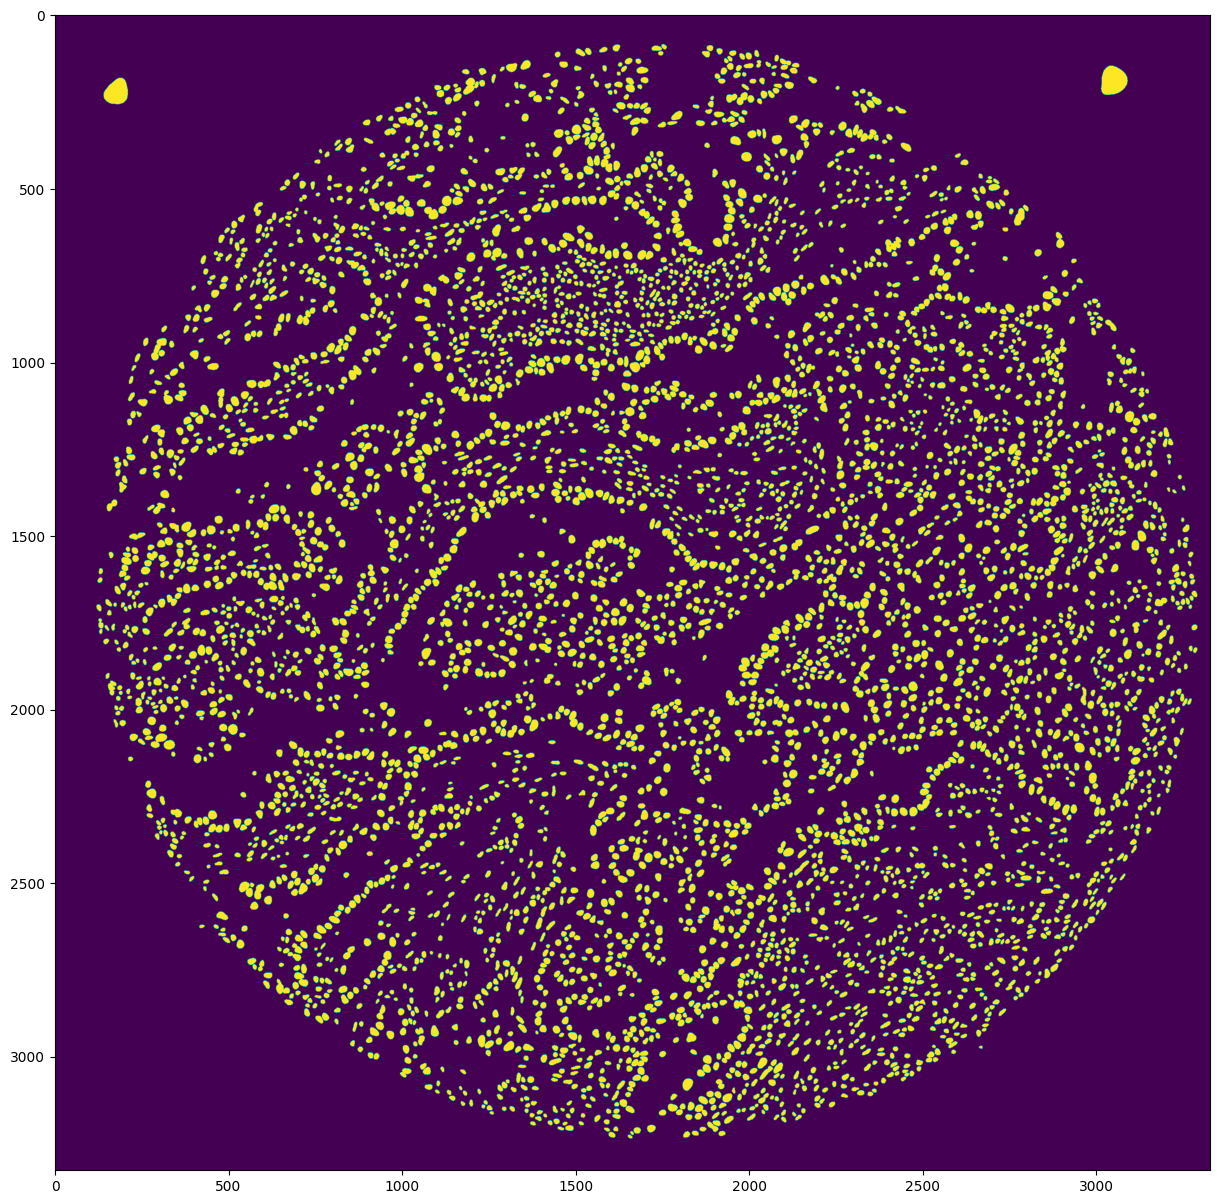

In [36]:
plt.figure(figsize=(15,15))
plt.imshow(t3)

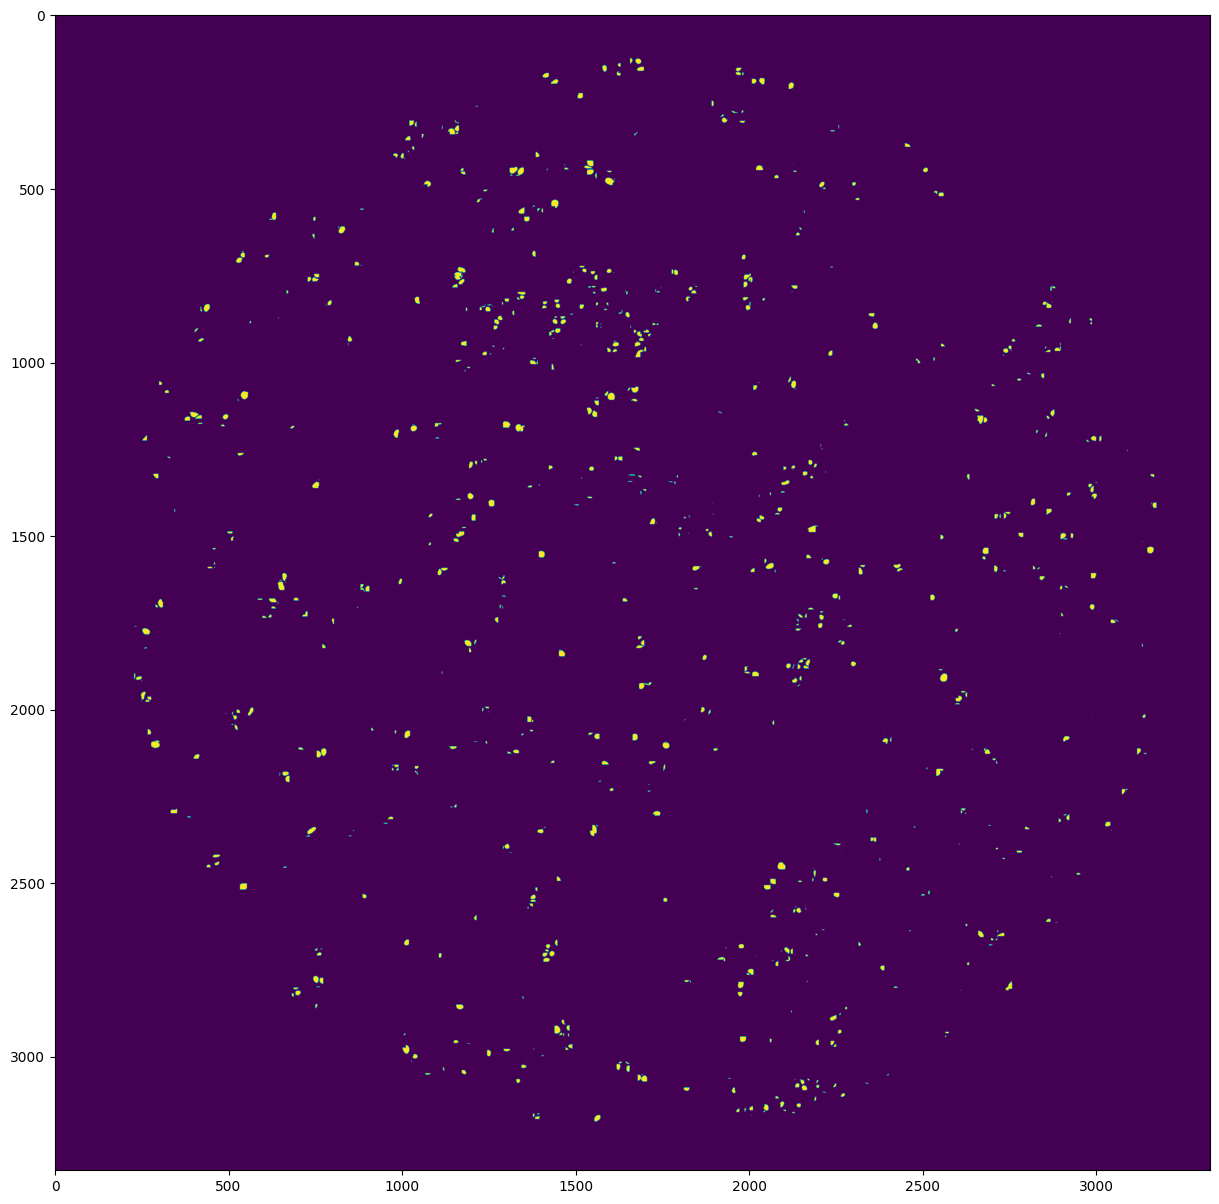

In [37]:
m1=cv2.bitwise_and(b,dilate)
m2=cv2.bitwise_and(m1,t3)
r,t=cv2.threshold(m2,0,255,cv2.THRESH_BINARY)
plt.figure(figsize=(15,15))
plt.imshow(t)

    #zeros=np.zeros(green.shape,np.uint8)
    
    
    #im2_final=cv2.bitwise_and(cd3p_2,cd3p_1_1)
    #mask=cv2.addWeighted(im2_final,1,img_he,1,0)
    #mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    #plt.imsave(pth_main_2+"/"+f"{x:03d}"+"/mask.png",mask)
    #plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",mask)
    #im3_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(11,11),0)
    #im3_final=cv2.medianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),25)
    #kernel = np.ones((15,15),np.uint8)
    #im3_final= cv2.dilate(im3_final,kernel,iterations = 1)
    #mask2=cv2.addWeighted(im3_final,1,img_he,1.2,0)
    #mask2=cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)

x=y
pth_main_2="/home/saab/Desktop/Processed_Data/Preprocessed_Data/Same_Slide/Stardist_27Jul/After/"
pth_main_5="/home/saab/Desktop/mask_2/"
os.makedirs(pth_main_2,exist_ok=True)
pth_main_3=pth_main_2+"/clear/"
os.makedirs(pth_main_3,exist_ok=True)
pth_main_4=pth_main_2+"/filtered_80_50_101_new/"
os.makedirs(pth_main_4,exist_ok=True)
os.makedirs(pth_main_5,exist_ok=True)
for a,b,c,d in zip(pths_cd3_2[y:y+z],pths_dapi_2[y:y+z],pths_bn_2[y:y+z],he_images[y:y+z]):
    img_cd3=cv2.imread(a,0)
    img_dapi=cv2.imread(b,0)
    img_b_n=cv2.imread(c)
    img_b_n=cv2.resize(img_b_n,(3328,3328))
    img_he=cv2.imread(d)
    img_he=cv2.resize(img_he,(3328,3328))
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/he.png",img_he)
    r,t1=cv2.threshold(img_cd3,0,255,cv2.THRESH_BINARY)
    r,t2=cv2.threshold(img_dapi,0,255,cv2.THRESH_BINARY)
    overlap=cv2.bitwise_and(t1,t2)
    kernel = np.ones((15,15),np.uint8)
    dilate= cv2.dilate(overlap,kernel,iterations = 1)
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/overlap.png",dilate)
    cd3p=cv2.bitwise_and(img_b_n,cv2.cvtColor(dilate,cv2.COLOR_GRAY2BGR))
    #kernel2 = np.ones((55,55),np.uint8)
    cd3p=cv2.dilate(cd3p,kernel,iterations = 1)
    cd3p_1=cv2.cvtColor(cd3p,cv2.COLOR_BGR2GRAY)
    cd3p_1_1=cv2.cvtColor(cd3p_1,cv2.COLOR_GRAY2BGR)
    green=np.ones(cd3p_1.shape,np.uint8)
    green=green*127
    zeros=np.zeros(green.shape,np.uint8)
    cd3p_2=cv2.merge([zeros,green,zeros])
    #im2_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    im2_final=cv2.bitwise_and(cd3p_2,cd3p_1_1)
    mask=cv2.addWeighted(im2_final,1,img_he,1,0)
    mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    #plt.imsave(pth_main_2+"/"+f"{x:03d}"+"/mask.png",mask)
    plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",mask)
    im3_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    plt.imsave(pth_main_5+"/"+f"{x:03d}"+".png",im3_final)
    mask2=cv2.addWeighted(im3_final,0.75,img_he,1,0)
    mask2=cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)
    plt.imsave(pth_main_4+"/"+f"{x:03d}"+".png",mask2)
    print(x)
    x=x+1

x=y
pth_main_2="/home/saab/Desktop/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Same_Slide/Stardist_27Jul/After/"
os.makedirs(pth_main_2,exist_ok=True)
pth_main_3=pth_main_2+"/clear/"
os.makedirs(pth_main_3,exist_ok=True)
pth_main_4=pth_main_2+"/filtered_70_120_101/"
os.makedirs(pth_main_4,exist_ok=True)
for a,b,c,d in zip(pths_cd3_2[y:y+z],pths_dapi_2[y:y+z],blue_n_images[y:y+z],he_images[y:y+z]):
    img_cd3=cv2.imread(a,0)
    img_dapi=cv2.imread(b,0)
    img_b_n=cv2.imread(c)
    img_b_n=cv2.resize(img_b_n,(3328,3328))
    img_he=cv2.imread(d)
    img_he=cv2.resize(img_he,(3328,3328))
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/he.png",img_he)
    r,t1=cv2.threshold(img_cd3,0,255,cv2.THRESH_BINARY)
    r,t2=cv2.threshold(img_dapi,0,255,cv2.THRESH_BINARY)
    overlap=cv2.bitwise_and(t1,t2)
    kernel = np.ones((15,15),np.uint8)
    dilate= cv2.dilate(overlap,kernel,iterations = 1)
    cv2.imwrite(pth_main+"/"+f"{x:03d}"+"/overlap.png",dilate)
    cd3p=cv2.bitwise_and(img_b_n,cv2.cvtColor(dilate,cv2.COLOR_GRAY2BGR))
    #kernel2 = np.ones((55,55),np.uint8)
    cd3p=cv2.dilate(cd3p,kernel,iterations = 1)
    cd3p_1=cv2.cvtColor(cd3p,cv2.COLOR_BGR2GRAY)
    cd3p_1_1=cv2.cvtColor(cd3p_1,cv2.COLOR_GRAY2BGR)
    green=np.ones(cd3p_1.shape,np.uint8)
    green=green*255
    zeros=np.zeros(green.shape,np.uint8)
    cd3p_2=cv2.merge([zeros,green,zeros])
    #im2_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    im2_final=cv2.bitwise_and(cd3p_2,cd3p_1_1)
    mask=cv2.addWeighted(im2_final,0,img_he,1.2,0)
    mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    #plt.imsave(pth_main_2+"/"+f"{x:03d}"+"/mask.png",mask)
    plt.imsave(pth_main_3+"/"+f"{x:03d}"+".png",mask)
    im3_final=cv2.GaussianBlur(cv2.bitwise_and(cd3p_2,cd3p_1_1),(101,101),0)
    mask2=cv2.addWeighted(im3_final,0.6,img_he,1.2,0)
    mask2=cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)
    plt.imsave(pth_main_4+"/"+f"{x:03d}"+".png",mask2)
    print(x)
    x=x+1

In [38]:
pf=pth_main+"/Before/"
pf
os.makedirs(pf,exist_ok=True)
old_ref=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/*/mif_cd68.png"))

In [17]:
old_ref

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/000/mif_cd68.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/001/mif_cd68.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/002/mif_cd68.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/003/mif_cd68.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/004/mif_cd68.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/005/mif_cd68.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68/2-image registration/blue_nuclei/Before/006/mif_cd68.png',
 '/med

In [18]:
thrs = [10, 15, 20, 25, 30, 40, 50, 60]
x=0
for img_path,old_path in zip(cd3_images,old_ref):
    # Read the image in grayscale
    img = cv2.imread(img_path, 0)
    old_img=cv2.imread(old_path,0)
    _, th_img = cv2.threshold(old_img, 0, 255, cv2.THRESH_BINARY)
    # Initialize a list to hold the images (original + thresholded)
 
    images = [img]
    titles = ["Original"]

    # Apply thresholding for each threshold value
    for th in thrs:
        _, th_img = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
        images.append(th_img)
        titles.append(f"Threshold {th}")
    
    # Create a 4x1 plot
    plt.figure(figsize=(30, 10))
    for i in range(9):
        plt.subplot(2, 9, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    # Save the plot
    plt.tight_layout()
    output_path = os.path.join(pf, f"{x:03d}_thresholds.png")
    plt.savefig(output_path, dpi=600)
    plt.close()
    
    x += 1

In [20]:
import cv2
import matplotlib.pyplot as plt
import os

thrs = [10, 15, 20, 25, 30, 35, 40, 50, 60]
x = 0
for img_path, old_path in zip(cd3_images, old_ref):
    # Read the image in grayscale
    img = cv2.imread(img_path, 0)
    old_img = cv2.imread(old_path, 0)
    _, th_img = cv2.threshold(old_img, 0, 255, cv2.THRESH_BINARY)
    
    # Initialize a list to hold the images (original + thresholded)
    images = [img]
    titles = ["Original"]

    # Apply thresholding for each threshold value
    for th in thrs:
        _, th_img = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
        images.append(th_img)
        titles.append(f"Threshold {th}")

    # Create a 2x5 plot
    plt.figure(figsize=(25, 13))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    # Save the plot
    plt.tight_layout()
    output_path = os.path.join(pf, f"{x:03d}_thresholds.png")
    plt.savefig(output_path, dpi=600)
    plt.close()
    
    x += 1
